<a href="https://colab.research.google.com/github/Ciro125/Desafio-Regressao-Tera/blob/main/Desafio_da_Regress%C3%A3o_TERA_Ciro_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports e Configs

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns

# Configurar o Plotly como o backend para os gráficos
pd.options.plotting.backend = "matplotlib"
# Configurar a opção para mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Importanto e estudando os dados

In [35]:
df = pd.read_csv("/content/Base de dados do Enem.csv")
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_MEDIA
0,210054403757,2021,14,M,2,3,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200401,Rio Branco,12,AC,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F,A,D,4.0,F,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,NaN
1,210053662224,2021,5,F,1,3,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200500,Sena Madureira,12,AC,1,1,1,1,909.0,881.0,892.0,899.0,407.8,555.2,555.3,374.5,AEDADBADDEEDADCBBBEABAEDAECDEEECAAADECCDCBACE,ACEDDAEADADABAEAABBADEBEAAABBBBBAAECBDADCABBB,99999EAEDADDDDDACDADCBBDCCDDDBBBBEEDCEEDECCDAB...,DACAACDECBCABEEADCDAEEAEEADACEAEAAABBCEDCBACD,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,140.0,200.0,140.0,160.0,200.0,840.0,F,F,D,D,6.0,B,A,B,C,A,B,B,A,A,B,A,A,A,B,A,A,C,A,B,B,546.56
2,210053154359,2021,14,F,0,3,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200401,Rio Branco,12,AC,1,1,1,1,911.0,880.0,890.0,902.0,446.7,466.5,375.1,448.6,DAACDEDBAAAABECBDABEABDABBAABBAAACAABEADAEBED,DACAAEBBBDDECDEACDEECBAAABEEDCBEAEDDCADEEEDDC,99999CBBDACEBEABBBACBABAEDABBBCADCBBBCAABEBBCA...,ABABABCABEEBADAAAAAABAEBABAAACACBCDCEBEDACABA,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,80.0,100.0,80.0,80.0,80.0,420.0,E,E,A,B,2.0,B,A,B,B,B,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,431.38
3,210054036560,2021,3,F,1,4,1,2,0,2,1.0,0,1200401.0,Rio Branco,12.0,AC,2.0,1.0,1.0,1200401,Rio Branco,12,AC,1,1,1,1,910.0,879.0,889.0,900.0,363.8,572.1,522.8,610.3,DBBAEDCEACCEBCDAACCDADBEEDEACAEEAADAECDCBEBAB,EEECDBABCAEAEBAACDEAABCBCAEBBEBABCDBEABDAEADB,99999CAEAACDCEEAECBAAAEDBEBCCABADABABDBDECCACB...,DBDDABDCEBCDAEBAADEBBAEDABDCCBEBCEEDABEBAEDCE,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,200.0,140.0,160.0,100.0,760.0,B,E,C,B,3.0,C,A,B,C,A,A,B,A,B,B,A,A,A,B,A,A,C,A,A,B,565.80
4,210051462654,2021,2,F,1,4,1,2,0,3,1.0,0,1200401.0,Rio Branco,12.0,AC,4.0,1.0,1.0,1200401,Rio Branco,12,AC,1,1,1,1,910.0,879.0,889.0,900.0,441.2,420.6,497.5,581.3,ABEABCDADDDEEAAACEAAABBCABBEBBBBCAEEDACCEBAEA,BCBACDAEDACBDDACCEEAADECACEBEDCACEADDECBBAACB,99999DACAABCEEBCDADCBADDCCBBEADCAAAABCDBAAAADB...,DDCCDBCEACDDBEBBCBACDACAEABCEBDAAAEECCACAAECB,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,180.0,200.0,160.0,200.0,200.0,940.0,E,E,D,D,8.0,E,A,E,D,D,B,B,B,B,B,B,A,A,E,A,A,E,A,B,B,576.12


In [36]:
df.shape

(168979, 77)

### Tipos de variaveis

In [37]:
dict(df.dtypes)

{'NU_INSCRICAO': dtype('int64'),
 'NU_ANO': dtype('int64'),
 'TP_FAIXA_ETARIA': dtype('int64'),
 'TP_SEXO': dtype('O'),
 'TP_ESTADO_CIVIL': dtype('int64'),
 'TP_COR_RACA': dtype('int64'),
 'TP_NACIONALIDADE': dtype('int64'),
 'TP_ST_CONCLUSAO': dtype('int64'),
 'TP_ANO_CONCLUIU': dtype('int64'),
 'TP_ESCOLA': dtype('int64'),
 'TP_ENSINO': dtype('float64'),
 'IN_TREINEIRO': dtype('int64'),
 'CO_MUNICIPIO_ESC': dtype('float64'),
 'NO_MUNICIPIO_ESC': dtype('O'),
 'CO_UF_ESC': dtype('float64'),
 'SG_UF_ESC': dtype('O'),
 'TP_DEPENDENCIA_ADM_ESC': dtype('float64'),
 'TP_LOCALIZACAO_ESC': dtype('float64'),
 'TP_SIT_FUNC_ESC': dtype('float64'),
 'CO_MUNICIPIO_PROVA': dtype('int64'),
 'NO_MUNICIPIO_PROVA': dtype('O'),
 'CO_UF_PROVA': dtype('int64'),
 'SG_UF_PROVA': dtype('O'),
 'TP_PRESENCA_CN': dtype('int64'),
 'TP_PRESENCA_CH': dtype('int64'),
 'TP_PRESENCA_LC': dtype('int64'),
 'TP_PRESENCA_MT': dtype('int64'),
 'CO_PROVA_CN': dtype('float64'),
 'CO_PROVA_CH': dtype('float64'),
 'CO_PROVA_L

### Histograma das médias

In [38]:
px.histogram(df, x='NU_MEDIA', nbins=500, title='Histograma da média')

### Valores Ausentes

In [39]:
# Calcule a contagem de valores ausentes em cada coluna em %
dict(100*df.isna().sum()/df.shape[0])

{'NU_INSCRICAO': 0.0,
 'NU_ANO': 0.0,
 'TP_FAIXA_ETARIA': 0.0,
 'TP_SEXO': 0.0,
 'TP_ESTADO_CIVIL': 0.0,
 'TP_COR_RACA': 0.0,
 'TP_NACIONALIDADE': 0.0,
 'TP_ST_CONCLUSAO': 0.0,
 'TP_ANO_CONCLUIU': 0.0,
 'TP_ESCOLA': 0.0,
 'TP_ENSINO': 68.42447878138704,
 'IN_TREINEIRO': 0.0,
 'CO_MUNICIPIO_ESC': 76.48465193899834,
 'NO_MUNICIPIO_ESC': 76.48465193899834,
 'CO_UF_ESC': 76.48465193899834,
 'SG_UF_ESC': 76.48465193899834,
 'TP_DEPENDENCIA_ADM_ESC': 76.48465193899834,
 'TP_LOCALIZACAO_ESC': 76.48465193899834,
 'TP_SIT_FUNC_ESC': 76.48465193899834,
 'CO_MUNICIPIO_PROVA': 0.0,
 'NO_MUNICIPIO_PROVA': 0.0,
 'CO_UF_PROVA': 0.0,
 'SG_UF_PROVA': 0.0,
 'TP_PRESENCA_CN': 0.0,
 'TP_PRESENCA_CH': 0.0,
 'TP_PRESENCA_LC': 0.0,
 'TP_PRESENCA_MT': 0.0,
 'CO_PROVA_CN': 34.52855088502122,
 'CO_PROVA_CH': 30.661798211612094,
 'CO_PROVA_LC': 30.661798211612094,
 'CO_PROVA_MT': 34.52855088502122,
 'NU_NOTA_CN': 34.52855088502122,
 'NU_NOTA_CH': 30.661798211612094,
 'NU_NOTA_LC': 30.661798211612094,
 'NU_NOTA_M

### Divisão das variaveis. (Drop, Quantitativas e Qualitativas)
Tanto para o primeiro modelo quanto para o segundo

In [40]:
vars_drop1 = [
    "NU_ANO",
    "NU_INSCRICAO",
    "TP_ESTADO_CIVIL",
    "TP_NACIONALIDADE",
    "TP_ANO_CONCLUIU",
    "IN_TREINEIRO",
    "TP_ENSINO",
    "CO_MUNICIPIO_ESC",
    "NO_MUNICIPIO_ESC",
    "CO_UF_ESC",
    "SG_UF_ESC",
    "TP_DEPENDENCIA_ADM_ESC",
    "TP_LOCALIZACAO_ESC",
    "TP_SIT_FUNC_ESC",
    "CO_MUNICIPIO_PROVA",
    "NO_MUNICIPIO_PROVA",
    "CO_UF_PROVA",
    "SG_UF_PROVA",
    "TP_PRESENCA_CN",
    "TP_PRESENCA_CH",
    "TP_PRESENCA_LC",
    "TP_PRESENCA_MT",
    "CO_PROVA_CN",
    "CO_PROVA_CH",
    "CO_PROVA_LC",
    "CO_PROVA_MT",
    "TX_RESPOSTAS_CN",
    "TX_RESPOSTAS_CH",
    "TX_RESPOSTAS_LC",
    "TX_RESPOSTAS_MT",
    "TX_GABARITO_CN",
    "TX_GABARITO_CH",
    "TX_GABARITO_LC",
    "TX_GABARITO_MT",
    "TP_STATUS_REDACAO",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "Q001",
    "Q002",
    "Q003",
    "Q004",
    "Q005",
    "Q007",
    "Q008",
    "Q009",
    "Q010",
    "Q011",
    "Q012",
    "Q013",
    "Q014",
    "Q015",
    "Q016",
    "Q017",
    "Q018",
    "Q019",
    "Q020",
    "Q021",
    "Q022",
    "Q023",
    "Q024",
    "Q025"
]

vars_quant = [
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_REDACAO",
    "NU_MEDIA"
]

vars_quali1 = [
    "TP_FAIXA_ETARIA",
    "TP_SEXO",
    "TP_COR_RACA",
    "TP_ST_CONCLUSAO",
    "TP_ESCOLA",
    "TP_LINGUA",
    "Q006"
]

In [41]:
vars_drop2 = [
    "NU_ANO",
    "NU_INSCRICAO",
    "TP_ESTADO_CIVIL",
    "TP_NACIONALIDADE",
    "TP_ANO_CONCLUIU",
    "IN_TREINEIRO",
    "TP_ENSINO",
    "CO_MUNICIPIO_ESC",
    "NO_MUNICIPIO_ESC",
    "CO_UF_ESC",
    "SG_UF_ESC",
    "TP_DEPENDENCIA_ADM_ESC",
    "TP_LOCALIZACAO_ESC",
    "TP_SIT_FUNC_ESC",
    "CO_MUNICIPIO_PROVA",
    "NO_MUNICIPIO_PROVA",
    "CO_UF_PROVA",
    "SG_UF_PROVA",
    "TP_PRESENCA_CN",
    "TP_PRESENCA_CH",
    "TP_PRESENCA_LC",
    "TP_PRESENCA_MT",
    "CO_PROVA_CN",
    "CO_PROVA_CH",
    "CO_PROVA_LC",
    "CO_PROVA_MT",
    "TX_RESPOSTAS_CN",
    "TX_RESPOSTAS_CH",
    "TX_RESPOSTAS_LC",
    "TX_RESPOSTAS_MT",
    "TX_GABARITO_CN",
    "TX_GABARITO_CH",
    "TX_GABARITO_LC",
    "TX_GABARITO_MT",
    "TP_STATUS_REDACAO",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5"
]

vars_quant = [
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_REDACAO",
    "NU_MEDIA"
]

vars_quali2 = [
    "TP_FAIXA_ETARIA",
    "TP_SEXO",
    "TP_COR_RACA",
    "TP_ST_CONCLUSAO",
    "TP_ESCOLA",
    "TP_LINGUA",
    "Q001",
    "Q002",
    "Q003",
    "Q004",
    "Q005",
    "Q006",
    "Q007",
    "Q008",
    "Q009",
    "Q010",
    "Q011",
    "Q012",
    "Q013",
    "Q014",
    "Q015",
    "Q016",
    "Q017",
    "Q018",
    "Q019",
    "Q020",
    "Q021",
    "Q022",
    "Q023",
    "Q024",
    "Q025"

]

### Legendas

In [42]:
legendas_faixas_renda = {
    "A": "Nenhuma Renda",
    "B": "Até R$ 1.100,00",
    "C": "De R$ 1.100,01 até R$ 1.650,00",
    "D": "De R$ 1.650,01 até R$ 2.200,00",
    "E": "De R$ 2.200,01 até R$ 2.750,00",
    "F": "De R$ 2.750,01 até R$ 3.300,00",
    "G": "De R$ 3.300,01 até R$ 4.400,00",
    "H": "De R$ 4.400,01 até R$ 5.500,00",
    "I": "De R$ 5.500,01 até R$ 6.600,00",
    "J": "De R$ 6.600,01 até R$ 7.700,00",
    "K": "De R$ 7.700,01 até R$ 8.800,00",
    "L": "De R$ 8.800,01 até R$ 9.900,00",
    "M": "De R$ 9.900,01 até R$ 11.000,00",
    "N": "De R$ 11.000,01 até R$ 13.200,00",
    "O": "De R$ 13.200,01 até R$ 16.500,00",
    "P": "De R$ 16.500,01 até R$ 22.000,00",
    "Q": "Acima de R$ 22.000,00"
}

legendas_faixa_etaria = {
    1: "Menor de 17 anos",
    2: "17 anos",
    3: "18 anos",
    4: "19 anos",
    5: "20 anos",
    6: "21 anos",
    7: "22 anos",
    8: "23 anos",
    9: "24 anos",
    10: "25 anos",
    11: "Entre 26 e 30 anos",
    12: "Entre 31 e 35 anos",
    13: "Entre 36 e 40 anos",
    14: "Entre 41 e 45 anos",
    15: "Entre 46 e 50 anos",
    16: "Entre 51 e 55 anos",
    17: "Entre 56 e 60 anos",
    18: "Entre 61 e 65 anos",
    19: "Entre 66 e 70 anos",
    20: "Maior de 70 anos"
}

legendas_cor_raca = {
    0: "Não declarado",
    1: "Branca",
    2: "Preta",
    3: "Parda",
    4: "Amarela",
    5: "Indígena",
    6: "Não dispõe da informação"
}

legendas_tipo_escola = {
    1: "Não Respondeu",
    2: "Pública",
    3: "Privada"
}

legendas_tipo_conclusao = {
    1: "Já concluí o Ensino Médio",
    2: "Estou cursando e concluirei o Ensino Médio em 2021",
    3: "Estou cursando e concluirei o Ensino Médio após 2021",
    4: "Não concluí e não estou cursando o Ensino Médio"
}

legendas_idioma = {
    0: "Inglês",
    1: "Espanhol"
}


In [43]:
df1 = df.drop(columns=vars_drop1)
df1.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q006,NU_MEDIA
0,14,M,3,1,1,NaN,NaN,NaN,NaN,1,NaN,F,NaN
1,5,F,3,1,1,407.8,555.2,555.3,374.5,1,840.0,B,546.56
2,14,F,3,1,1,446.7,466.5,375.1,448.6,1,420.0,B,431.38
3,3,F,4,2,2,363.8,572.1,522.8,610.3,1,760.0,C,565.80
4,2,F,4,2,3,441.2,420.6,497.5,581.3,1,940.0,E,576.12


In [121]:
df2 = df.drop(columns=vars_drop2)

In [44]:
dict(100*df1.isna().sum()/df1.shape[0])

{'TP_FAIXA_ETARIA': 0.0,
 'TP_SEXO': 0.0,
 'TP_COR_RACA': 0.0,
 'TP_ST_CONCLUSAO': 0.0,
 'TP_ESCOLA': 0.0,
 'NU_NOTA_CN': 34.52855088502122,
 'NU_NOTA_CH': 30.661798211612094,
 'NU_NOTA_LC': 30.661798211612094,
 'NU_NOTA_MT': 34.52855088502122,
 'TP_LINGUA': 0.0,
 'NU_NOTA_REDACAO': 30.661798211612094,
 'Q006': 0.0,
 'NU_MEDIA': 34.764674900431416}

In [45]:
df1[vars_quant].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_MEDIA
count,110633.000000,117167.000000,117167.000000,110633.000000,117167.000000,110234.000000
mean,491.584843,519.890758,502.602586,534.728997,611.937320,535.081736
std,80.307762,95.528557,78.742439,110.622848,190.313833,88.804250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,431.200000,445.500000,447.900000,444.300000,520.000000,471.220000
50%,482.100000,522.100000,505.900000,515.200000,600.000000,527.340000
75%,545.100000,589.100000,558.700000,613.400000,740.000000,593.960000
max,867.100000,846.900000,820.500000,953.100000,980.000000,846.660000


In [46]:
df1[vars_quali1].describe()

,TP_FAIXA_ETARIA,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_LINGUA
count,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000
mean,5.398132,2.048296,1.598074,1.387776,0.472775
std,3.951201,1.020789,0.720038,0.591589,0.499260
min,1.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000
50%,4.000000,2.000000,1.000000,1.000000,0.000000
75%,8.000000,3.000000,2.000000,2.000000,1.000000
max,20.000000,5.000000,4.000000,3.000000,1.000000


In [47]:
corr1 = df1.corr()
corr1

<ipython-input-47-e479193984b9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,TP_FAIXA_ETARIA,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,NU_MEDIA
TP_FAIXA_ETARIA,1.000000,0.110494,-0.619774,-0.404085,0.024391,0.041259,-0.053031,-0.098640,0.195809,-0.133325,-0.073895
TP_COR_RACA,0.110494,1.000000,-0.095571,-0.064890,-0.186532,-0.177098,-0.205685,-0.204193,0.159452,-0.135563,-0.217316
TP_ST_CONCLUSAO,-0.619774,-0.095571,1.000000,0.365892,-0.093615,-0.083807,-0.034141,-0.002153,-0.142753,-0.026101,-0.055879
TP_ESCOLA,-0.404085,-0.064890,0.365892,1.000000,0.018247,-0.004189,0.013331,0.057945,-0.085296,0.051965,0.041651
NU_NOTA_CN,0.024391,-0.186532,-0.093615,0.018247,1.000000,0.670534,0.659074,0.668248,-0.253347,0.466705,0.798062
NU_NOTA_CH,0.041259,-0.177098,-0.083807,-0.004189,0.670534,1.000000,0.748918,0.620723,-0.246482,0.481611,0.819011
NU_NOTA_LC,-0.053031,-0.205685,-0.034141,0.013331,0.659074,0.748918,1.000000,0.628300,-0.279248,0.504400,0.820422
NU_NOTA_MT,-0.098640,-0.204193,-0.002153,0.057945,0.668248,0.620723,0.628300,1.000000,-0.289493,0.488889,0.813919
TP_LINGUA,0.195809,0.159452,-0.142753,-0.085296,-0.253347,-0.246482,-0.279248,-0.289493,1.000000,-0.186529,-0.299159
NU_NOTA_REDACAO,-0.133325,-0.135563,-0.026101,0.051965,0.466705,0.481611,0.504400,0.488889,-0.186529,1.000000,0.810836


In [48]:
# Crie uma figura de heatmap usando o Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr1.values,
    x=corr1.columns,
    y=corr1.columns,
    colorscale='RdBu',

))

# Ajuste o tamanho da figura
fig.update_layout(
    title='Matriz de Correlação',
    xaxis_title='Variáveis',
    yaxis_title='Variáveis',
    width=800,  # Defina a largura da figura
    height=600  # Defina a altura da figura
)

# Exiba o gráfico
fig.show()

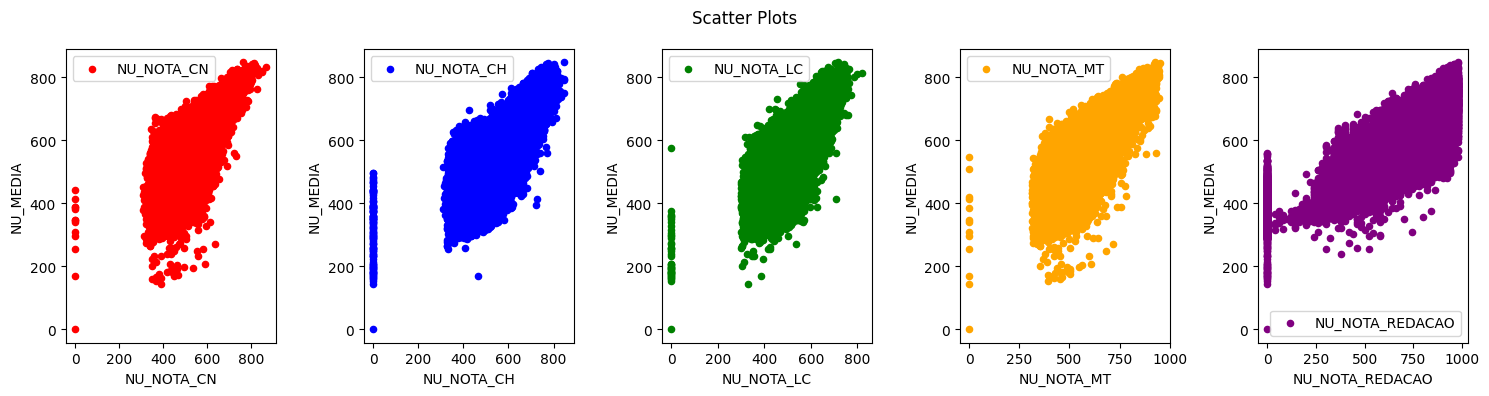

In [49]:
# Crie a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))

# Crie os scatter plots em cada subplot
df.plot.scatter(x='NU_NOTA_CN', y='NU_MEDIA', c='red', label='NU_NOTA_CN', ax=axes[0])
df.plot.scatter(x='NU_NOTA_CH', y='NU_MEDIA', c='blue', label='NU_NOTA_CH', ax=axes[1])
df.plot.scatter(x='NU_NOTA_LC', y='NU_MEDIA', c='green', label='NU_NOTA_LC', ax=axes[2])
df.plot.scatter(x='NU_NOTA_MT', y='NU_MEDIA', c='orange', label='NU_NOTA_MT', ax=axes[3])
df.plot.scatter(x='NU_NOTA_REDACAO', y='NU_MEDIA', c='purple', label='NU_NOTA_REDACAO', ax=axes[4])

# Defina o título e os rótulos dos eixos
fig.suptitle('Scatter Plots')
axes[0].set_xlabel('NU_NOTA_CN')
axes[0].set_ylabel('NU_MEDIA')
axes[1].set_xlabel('NU_NOTA_CH')
axes[1].set_ylabel('NU_MEDIA')
axes[2].set_xlabel('NU_NOTA_LC')
axes[2].set_ylabel('NU_MEDIA')
axes[3].set_xlabel('NU_NOTA_MT')
axes[3].set_ylabel('NU_MEDIA')
axes[4].set_xlabel('NU_NOTA_REDACAO')
axes[4].set_ylabel('NU_MEDIA')

# Ajuste o espaçamento entre os subplots
plt.tight_layout()

# Exiba o gráfico
plt.show()

In [50]:
#Ordenando a coluna Q006 pros gráficos
import string

# Gerar a lista de categorias até o valor "Q"
ordem_categorias = list(string.ascii_uppercase[:string.ascii_uppercase.index('R')])

# Criar a coluna categórica com a ordem definida
df["Q006"] = pd.Categorical(df["Q006"], categories=ordem_categorias, ordered=True)


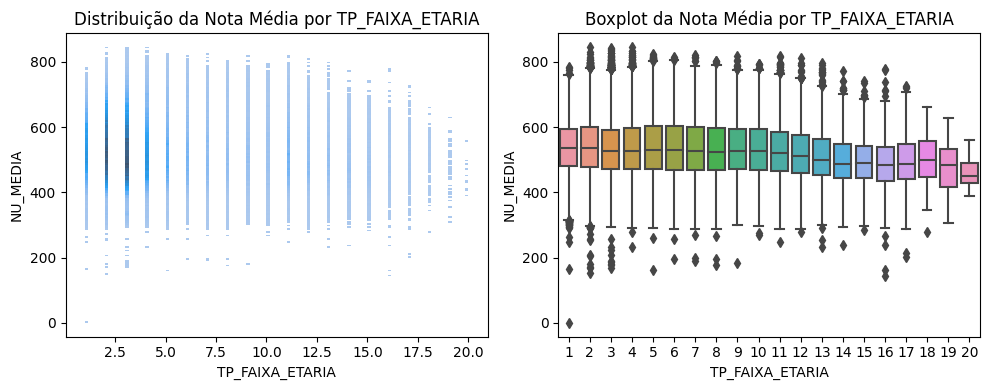

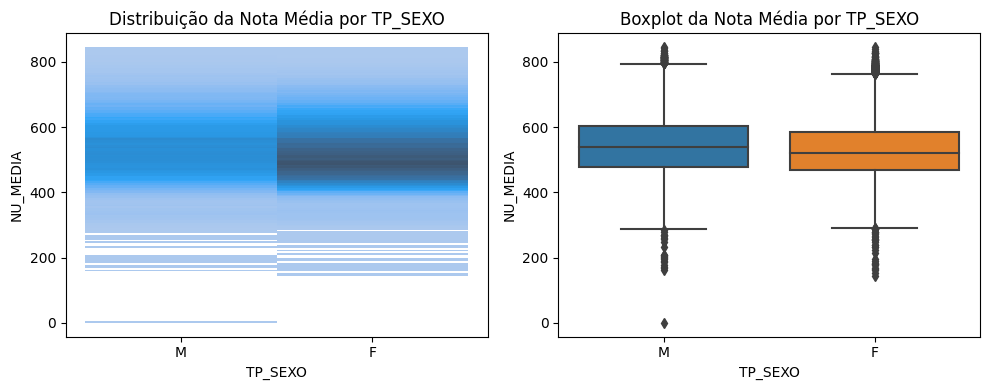

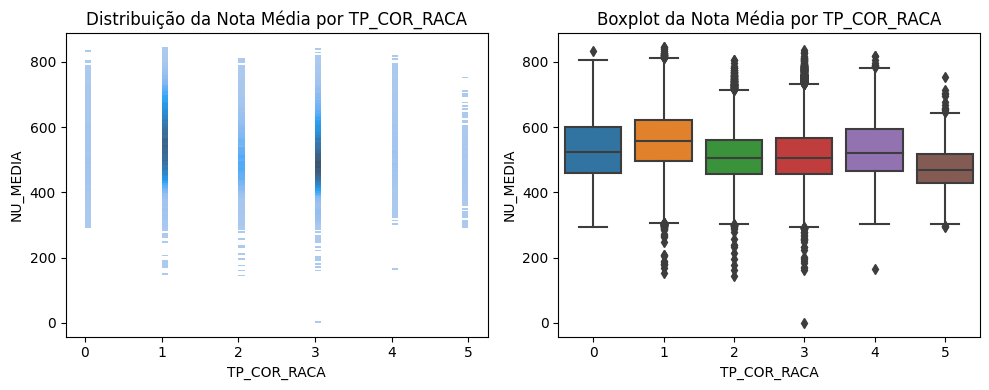

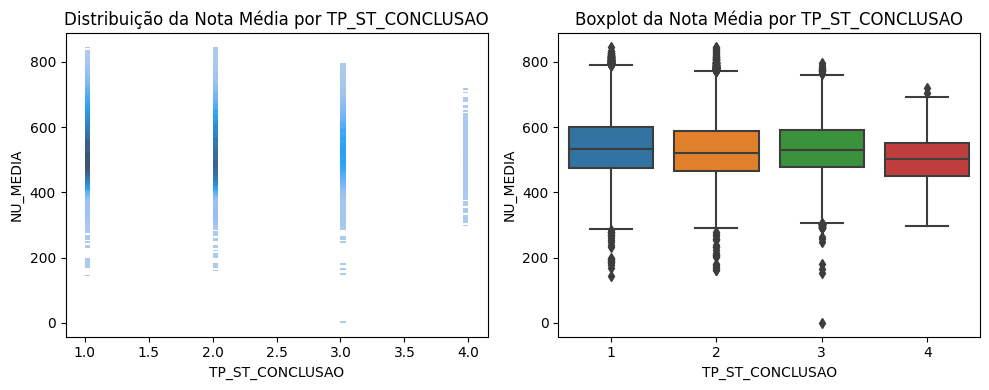

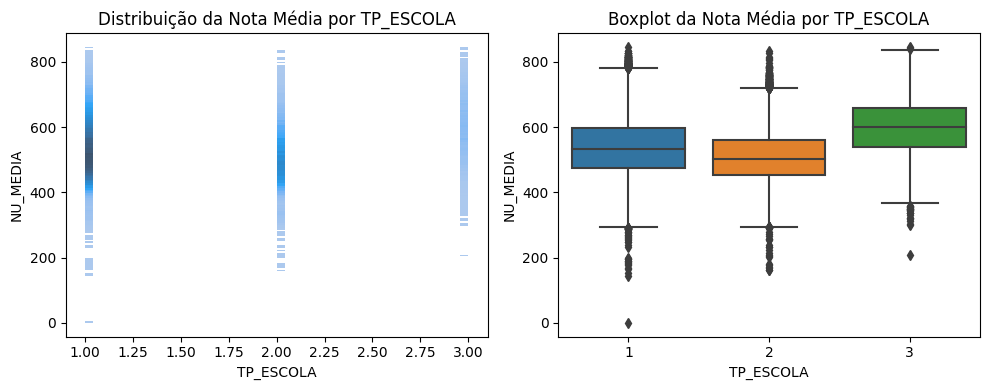

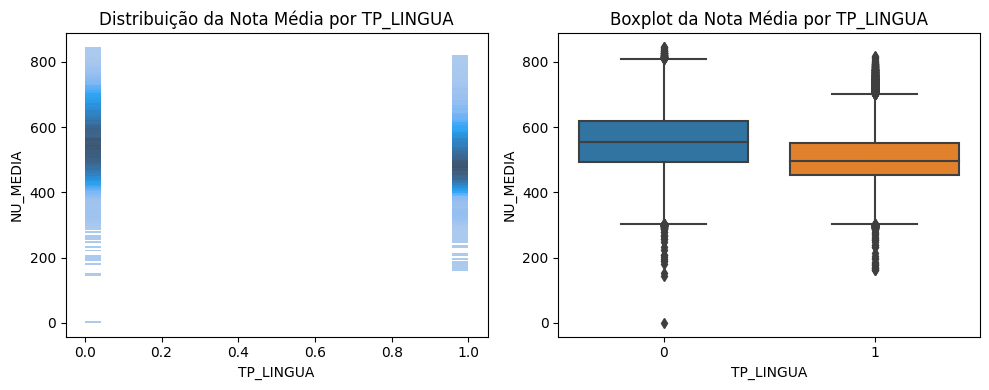

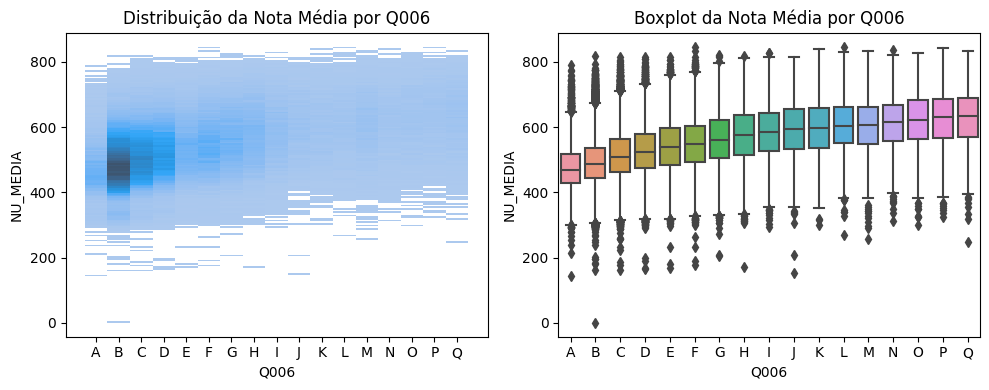

In [51]:
# Plotar histogramas e boxplots para cada variável categórica
for var in vars_quali1:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=var, y="NU_MEDIA", kde=True)
    plt.title(f"Distribuição da Nota Média por {var}")
    plt.xlabel(var)
    plt.ylabel("NU_MEDIA")

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=var, y="NU_MEDIA")
    plt.title(f"Boxplot da Nota Média por {var}")
    plt.xlabel(var)
    plt.ylabel("NU_MEDIA")

    plt.tight_layout()
    plt.show()

# Conclusão da analise exploratoria 

A análise dos dados revelou que vários fatores influenciam o desempenho acadêmico dos estudantes. A faixa de renda, a escolaridade, o tipo de escola, a cor/raça e a faixa etária foram identificados como variáveis importantes nesse contexto.

Verificou-se que a faixa de renda está positivamente relacionada ao desempenho acadêmico, indicando que estudantes com renda mais alta tendem a obter notas mais altas. Além disso, a escolaridade e o tipo de escola também desempenham papéis significativos, com alunos mais instruídos e que frequentam escolas particulares apresentando notas mais altas.

A análise também revelou disparidades com base na cor/raça, indicando que diferentes grupos raciais podem ter médias de notas distintas. Essas disparidades ressaltam a importância de abordar a equidade racial no sistema educacional e garantir igualdade de oportunidades para todos os estudantes.

A faixa etária dos estudantes foi um fator que apresentou uma modificação significativa nas médias de notas. A partir dos 36 anos de idade, houve uma mudança negativa no desempenho acadêmico dos estudantes, indicando que fatores relacionados à idade podem influenciar de forma adversa o desempenho nessa faixa etária.

Por outro lado, não foram encontradas diferenças significativas entre homens e mulheres em relação ao desempenho acadêmico. Isso sugere que o gênero não é um fator que influencia diretamente as médias de notas dos estudantes.

Em suma, a faixa de renda, a escolaridade, o tipo de escola e a cor/raça são variáveis que afetam o desempenho acadêmico dos estudantes, enquanto não há diferenças significativas entre homens e mulheres nesse aspecto. Esses resultados destacam a importância de políticas educacionais que visem reduzir desigualdades socioeconômicas, promover a equidade racial e proporcionar igualdade de oportunidades para todos os estudantes, independentemente do gênero. 

# Pré processamento e Limpeza dos dados

In [60]:
df1

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q006,NU_MEDIA
0,14,M,3,1,1,NaN,NaN,NaN,NaN,1,NaN,F,NaN
1,5,F,3,1,1,407.8,555.2,555.3,374.5,1,840.0,B,546.56
2,14,F,3,1,1,446.7,466.5,375.1,448.6,1,420.0,B,431.38
3,3,F,4,2,2,363.8,572.1,522.8,610.3,1,760.0,C,565.80
4,2,F,4,2,3,441.2,420.6,497.5,581.3,1,940.0,E,576.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168974,11,F,0,1,1,NaN,333.9,352.6,NaN,1,580.0,B,NaN
168975,10,F,3,1,1,NaN,NaN,NaN,NaN,1,NaN,B,NaN
168976,3,F,1,1,1,NaN,NaN,NaN,NaN,1,NaN,B,NaN
168977,8,F,3,1,1,528.7,495.8,546.8,408.0,1,560.0,B,507.86


## Tratando os Missing Values

In [62]:
dict(100*df1.isna().sum()/df1.shape[0])

{'TP_FAIXA_ETARIA': 0.0,
 'TP_SEXO': 0.0,
 'TP_COR_RACA': 0.0,
 'TP_ST_CONCLUSAO': 0.0,
 'TP_ESCOLA': 0.0,
 'NU_NOTA_CN': 34.52855088502122,
 'NU_NOTA_CH': 30.661798211612094,
 'NU_NOTA_LC': 30.661798211612094,
 'NU_NOTA_MT': 34.52855088502122,
 'TP_LINGUA': 0.0,
 'NU_NOTA_REDACAO': 30.661798211612094,
 'Q006': 0.0,
 'NU_MEDIA': 34.764674900431416}

In [70]:
df1.isna()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q006,NU_MEDIA
0,False,False,False,False,False,True,True,True,True,False,True,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168974,False,False,False,False,False,True,False,False,True,False,False,False,True
168975,False,False,False,False,False,True,True,True,True,False,True,False,True
168976,False,False,False,False,False,True,True,True,True,False,True,False,True
168977,False,False,False,False,False,False,False,False,False,False,False,False,False


In [71]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


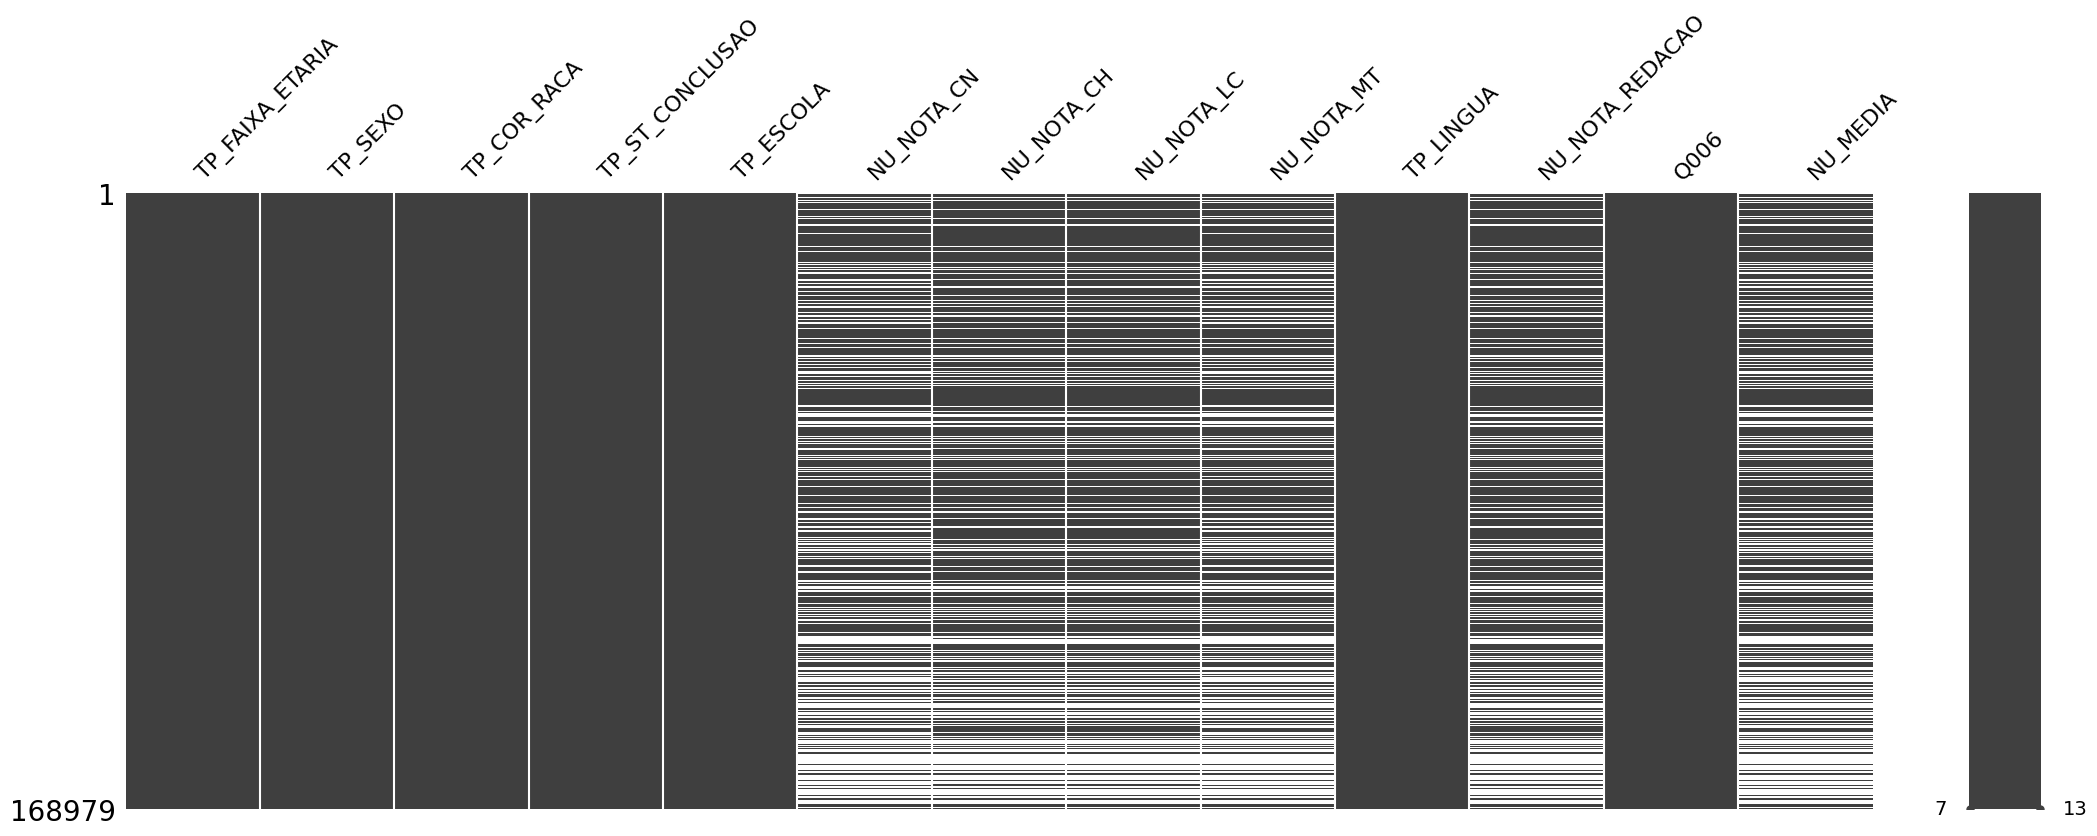

In [72]:
import missingno as msno
# Para aplicar a matriz de missings, usamos a função matrix()
msno.matrix(df1,figsize=(25,8))
plt.show()

Eu optei por dropar os NA, depois de uma analise em que a maioria dos casos que não possuiam notas na média foram pessoas que não realizaram algumas das provas logo por isso as notas eram NA.
E por achar que temos dados suficientes para alimentar o modelo.

In [73]:
df1_semna = df1.dropna()

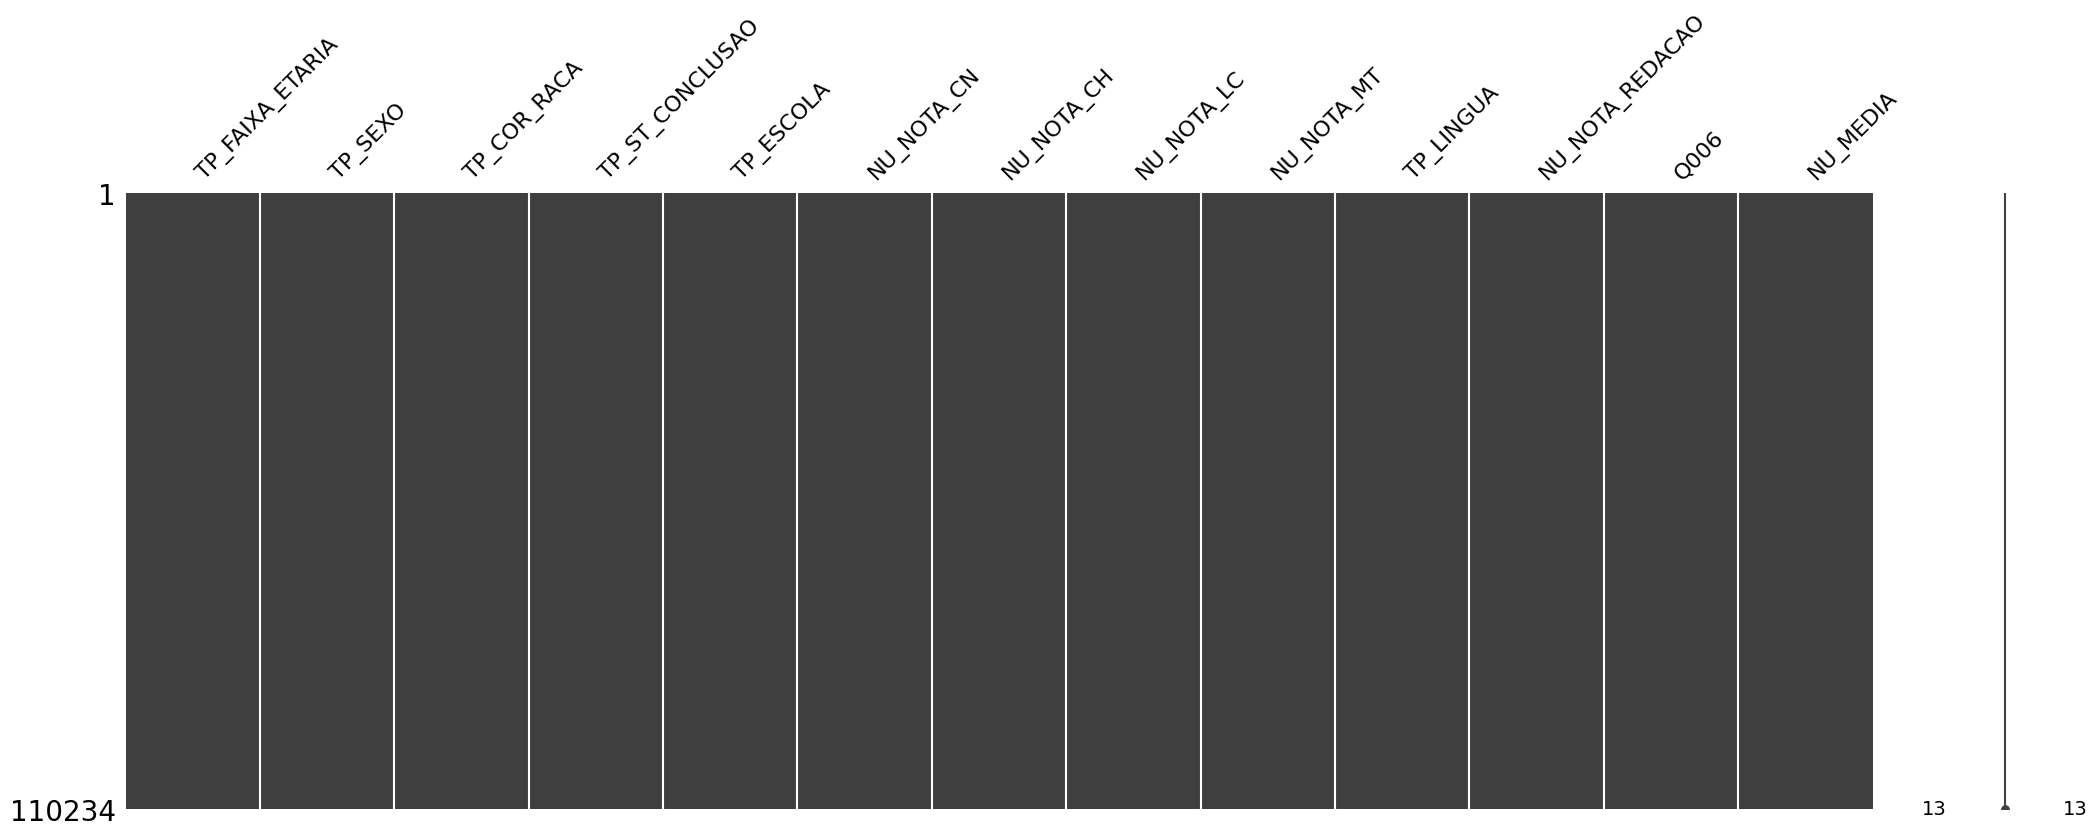

In [75]:
msno.matrix(df1_semna,figsize=(25,8))
plt.show()

In [74]:
df1_semna

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q006,NU_MEDIA
1,5,F,3,1,1,407.8,555.2,555.3,374.5,1,840.0,B,546.56
2,14,F,3,1,1,446.7,466.5,375.1,448.6,1,420.0,B,431.38
3,3,F,4,2,2,363.8,572.1,522.8,610.3,1,760.0,C,565.80
4,2,F,4,2,3,441.2,420.6,497.5,581.3,1,940.0,E,576.12
5,3,F,1,2,2,379.7,362.3,360.1,439.1,1,500.0,B,408.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168963,11,M,3,1,1,435.9,487.0,370.5,377.9,1,580.0,C,450.26
168964,11,F,1,1,1,529.9,518.8,549.7,450.8,1,600.0,B,529.84
168971,2,F,2,2,2,398.3,339.2,497.8,447.0,1,540.0,C,444.46
168972,8,F,2,1,1,444.3,353.5,442.2,350.4,1,500.0,C,418.08


Dropei as variaveis da nota, pois não faria sentido deixalas no modelo sendo que a variavel que queremos predizer é a media delas. 

In [77]:
drop1 = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]

df1_semna.drop(columns=drop1)

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_LINGUA,Q006,NU_MEDIA
1,5,F,3,1,1,1,B,546.56
2,14,F,3,1,1,1,B,431.38
3,3,F,4,2,2,1,C,565.80
4,2,F,4,2,3,1,E,576.12
5,3,F,1,2,2,1,B,408.24
...,...,...,...,...,...,...,...,...
168963,11,M,3,1,1,1,C,450.26
168964,11,F,1,1,1,1,B,529.84
168971,2,F,2,2,2,1,C,444.46
168972,8,F,2,1,1,1,C,418.08


## Aplicando o one hot encoder

In [79]:
# Importando e instanciando um One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

# Assim como em outros objetos do scikit-learn, também contamos com os métodos .fit() e .transform()
ohe.fit(df1_semna[['TP_FAIXA_ETARIA','TP_SEXO','TP_COR_RACA','TP_ST_CONCLUSAO','TP_ESCOLA','TP_LINGUA','Q006']])

# O resultado da transformação será um array
df1_semna_ohe = ohe.transform(df1_semna[['TP_FAIXA_ETARIA','TP_SEXO','TP_COR_RACA','TP_ST_CONCLUSAO','TP_ESCOLA','TP_LINGUA','Q006']]).todense()
df1_semna_ohe

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
# Convertendo o resultado da transformação em um dataframe
dfvis_semna_ohe1 = pd.DataFrame(df1_semna_ohe,columns=ohe.get_feature_names_out()) # Pega o nome das colunas
 
# Mostrando o resultado
dfvis_semna_ohe1.head()

,TP_FAIXA_ETARIA_1,TP_FAIXA_ETARIA_2,TP_FAIXA_ETARIA_3,TP_FAIXA_ETARIA_4,TP_FAIXA_ETARIA_5,TP_FAIXA_ETARIA_6,TP_FAIXA_ETARIA_7,TP_FAIXA_ETARIA_8,TP_FAIXA_ETARIA_9,TP_FAIXA_ETARIA_10,TP_FAIXA_ETARIA_11,TP_FAIXA_ETARIA_12,TP_FAIXA_ETARIA_13,TP_FAIXA_ETARIA_14,TP_FAIXA_ETARIA_15,TP_FAIXA_ETARIA_16,TP_FAIXA_ETARIA_17,TP_FAIXA_ETARIA_18,TP_FAIXA_ETARIA_19,TP_FAIXA_ETARIA_20,TP_SEXO_F,TP_SEXO_M,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ESCOLA_1,TP_ESCOLA_2,TP_ESCOLA_3,TP_LINGUA_0,TP_LINGUA_1,Q006_A,Q006_B,Q006_C,Q006_D,Q006_E,Q006_F,Q006_G,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


O modelo não precisa ser normalizado pois todas as variaveis são categoricas.

# Criando o modelo de Regressão Linear StatsModel

Imports

In [135]:
import statsmodels.api as sm

Separando Inputs e Outputs

In [92]:
x = dfvis_semna_ohe1
y = df1_semna[["NU_MEDIA"]]

In [107]:
x = x.reset_index()
y = y.reset_index()

In [114]:
y = y.drop(columns = "index")

In [117]:
x = x.drop(columns = "index")

Criando os modelos

In [118]:
mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               NU_MEDIA   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     1033.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        13:34:19   Log-Likelihood:            -6.3121e+05
No. Observations:              110234   AIC:                         1.263e+06
Df Residuals:                  110187   BIC:                         1.263e+06
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
TP_FAIXA_ETARIA_1     46.0776      1

In [119]:
mod = sm.WLS(y,x)
res = mod.fit()
print(res.summary())

                            WLS Regression Results                            
Dep. Variable:               NU_MEDIA   R-squared:                       0.301
Model:                            WLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     1033.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        13:37:09   Log-Likelihood:            -6.3121e+05
No. Observations:              110234   AIC:                         1.263e+06
Df Residuals:                  110187   BIC:                         1.263e+06
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
TP_FAIXA_ETARIA_1     46.0776      1

# Criando o modelo de Regressão Linear do Sklearn (Mais robusto e utilizando mais features)

In [122]:
df2

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_MEDIA
0,14,M,3,1,1,NaN,NaN,NaN,NaN,1,NaN,A,F,A,D,4.0,F,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,NaN
1,5,F,3,1,1,407.8,555.2,555.3,374.5,1,840.0,F,F,D,D,6.0,B,A,B,C,A,B,B,A,A,B,A,A,A,B,A,A,C,A,B,B,546.56
2,14,F,3,1,1,446.7,466.5,375.1,448.6,1,420.0,E,E,A,B,2.0,B,A,B,B,B,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,431.38
3,3,F,4,2,2,363.8,572.1,522.8,610.3,1,760.0,B,E,C,B,3.0,C,A,B,C,A,A,B,A,B,B,A,A,A,B,A,A,C,A,A,B,565.80
4,2,F,4,2,3,441.2,420.6,497.5,581.3,1,940.0,E,E,D,D,8.0,E,A,E,D,D,B,B,B,B,B,B,A,A,E,A,A,E,A,B,B,576.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168974,11,F,0,1,1,NaN,333.9,352.6,NaN,1,580.0,C,E,A,A,4.0,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,D,A,B,B,NaN
168975,10,F,3,1,1,NaN,NaN,NaN,NaN,1,NaN,H,E,F,C,1.0,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B,NaN
168976,3,F,1,1,1,NaN,NaN,NaN,NaN,1,NaN,E,E,C,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,NaN
168977,8,F,3,1,1,528.7,495.8,546.8,408.0,1,560.0,A,E,A,A,3.0,B,A,B,C,A,A,B,A,B,A,A,A,A,A,A,A,B,A,B,B,507.86


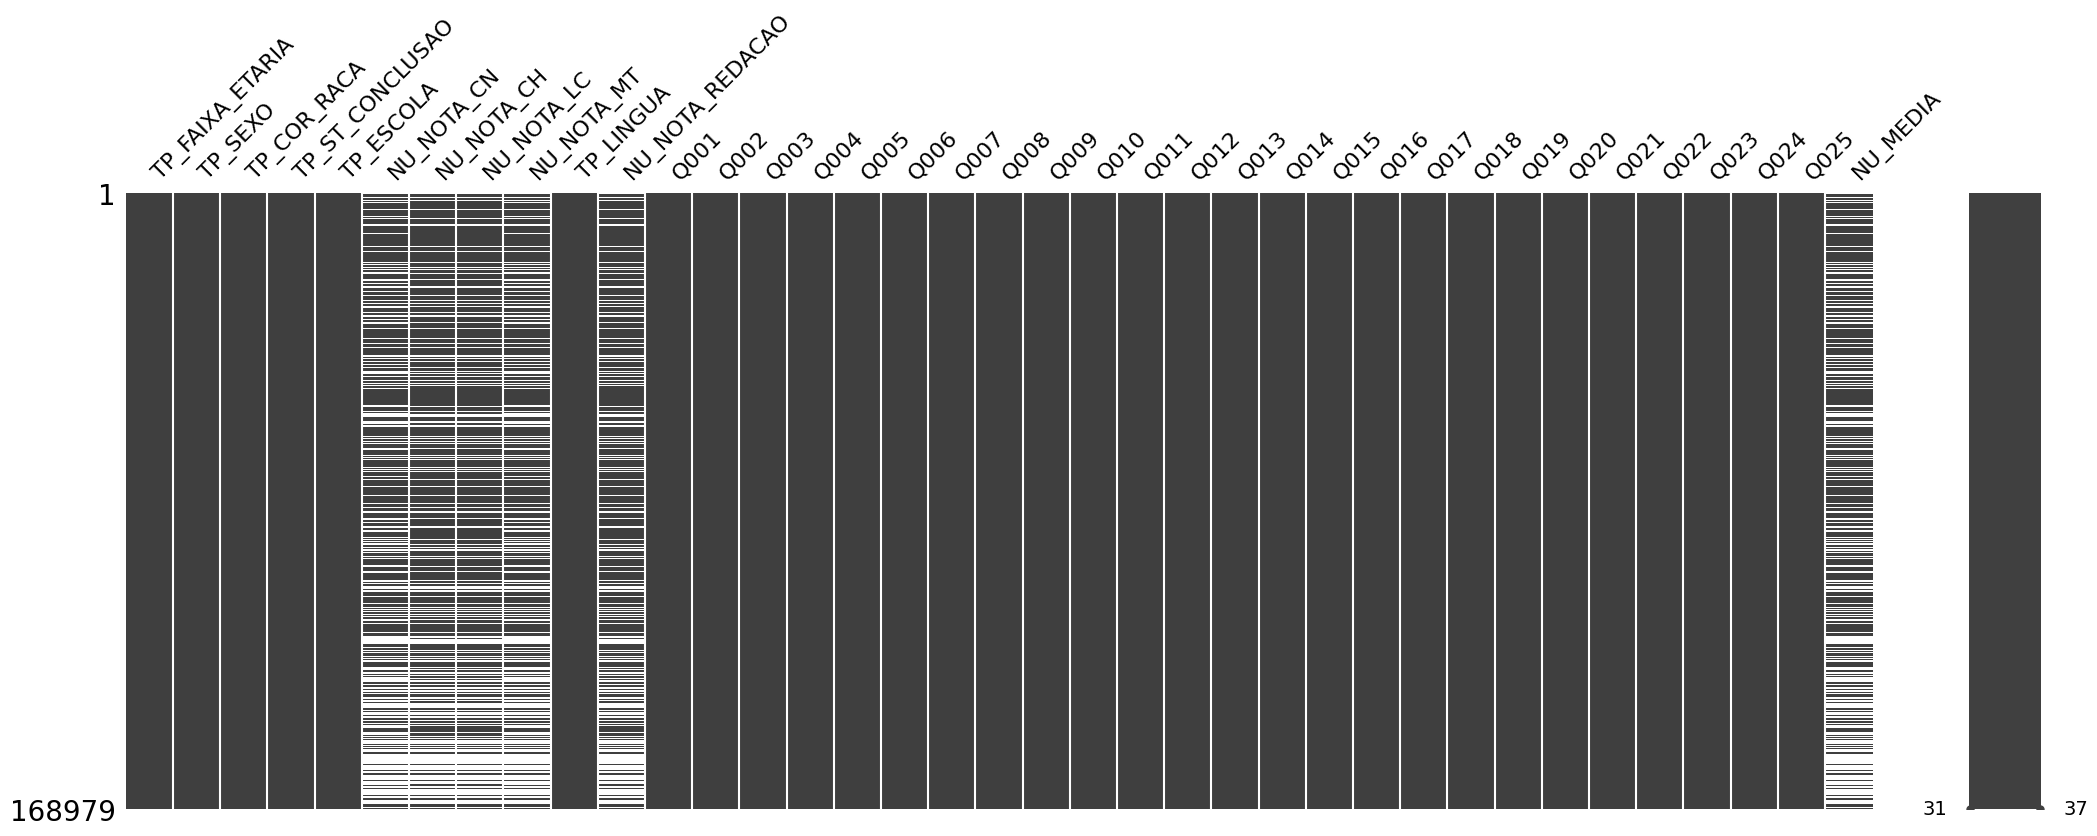

In [123]:
msno.matrix(df2,figsize=(25,8))
plt.show()

Vou continuar dropando os valores faltantes pois nesse caso realmente acredito que não faz sentido utilizalos. Sabendo que em certos casos não é a melhor opção.
E vou dropar também as notas sem as médias pois não quero criar um modelo calculadora.

In [124]:
df2_semna = df2.dropna()

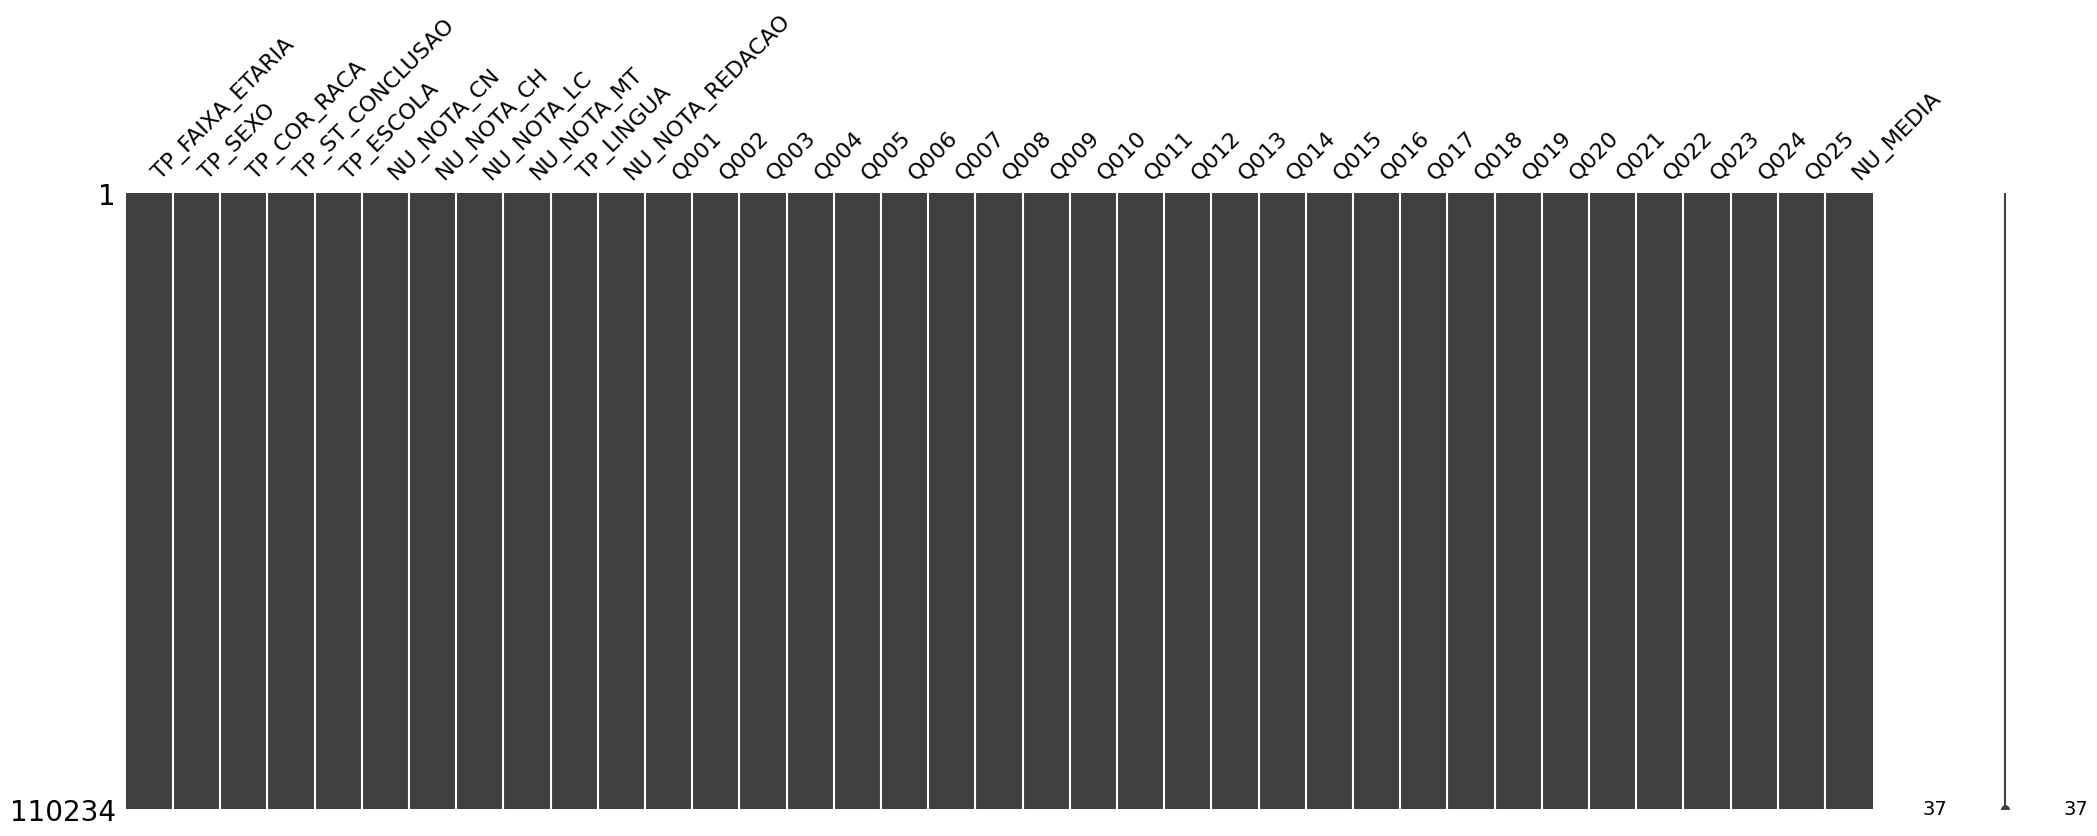

In [125]:
msno.matrix(df2_semna,figsize=(25,8))
plt.show()

In [129]:
df2_semna = df2_semna.drop(columns=drop1)

In [131]:
df2_semna

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_LINGUA,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_MEDIA
1,5,F,3,1,1,1,F,F,D,D,6.0,B,A,B,C,A,B,B,A,A,B,A,A,A,B,A,A,C,A,B,B,546.56
2,14,F,3,1,1,1,E,E,A,B,2.0,B,A,B,B,B,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,431.38
3,3,F,4,2,2,1,B,E,C,B,3.0,C,A,B,C,A,A,B,A,B,B,A,A,A,B,A,A,C,A,A,B,565.80
4,2,F,4,2,3,1,E,E,D,D,8.0,E,A,E,D,D,B,B,B,B,B,B,A,A,E,A,A,E,A,B,B,576.12
5,3,F,1,2,2,1,B,E,C,B,5.0,B,A,B,C,A,A,B,B,A,B,A,A,A,B,A,A,E,A,A,B,408.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168963,11,M,3,1,1,1,B,B,C,B,3.0,C,A,B,B,A,B,B,A,A,A,A,A,A,B,A,A,C,A,A,B,450.26
168964,11,F,1,1,1,1,B,C,D,B,3.0,B,A,C,C,B,A,B,A,B,A,A,A,A,B,A,A,C,A,B,B,529.84
168971,2,F,2,2,2,1,C,B,C,D,6.0,C,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,D,A,A,B,444.46
168972,8,F,2,1,1,1,C,F,C,B,2.0,C,A,C,C,A,A,B,A,B,A,A,A,A,A,A,A,C,A,C,B,418.08


## Aplicando o One Hot Encoder

In [132]:
ohe = OneHotEncoder()

# Assim como em outros objetos do scikit-learn, também contamos com os métodos .fit() e .transform()
ohe.fit(df2_semna[['TP_FAIXA_ETARIA','TP_SEXO','TP_COR_RACA','TP_ST_CONCLUSAO','TP_ESCOLA','TP_LINGUA','Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']])

# O resultado da transformação será um array
df2_semna_ohe = ohe.transform(df2_semna[['TP_FAIXA_ETARIA','TP_SEXO','TP_COR_RACA','TP_ST_CONCLUSAO','TP_ESCOLA','TP_LINGUA','Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']]).todense()
df2_semna_ohe

matrix([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 1., ..., 0., 0., 1.],
        ...,
        [0., 1., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [133]:
# Convertendo o resultado da transformação em um dataframe
dfvis_semna_ohe2 = pd.DataFrame(df2_semna_ohe,columns=ohe.get_feature_names_out()) # Pega o nome das colunas
 
# Mostrando o resultado
dfvis_semna_ohe2.head()

,TP_FAIXA_ETARIA_1,TP_FAIXA_ETARIA_2,TP_FAIXA_ETARIA_3,TP_FAIXA_ETARIA_4,TP_FAIXA_ETARIA_5,TP_FAIXA_ETARIA_6,TP_FAIXA_ETARIA_7,TP_FAIXA_ETARIA_8,TP_FAIXA_ETARIA_9,TP_FAIXA_ETARIA_10,TP_FAIXA_ETARIA_11,TP_FAIXA_ETARIA_12,TP_FAIXA_ETARIA_13,TP_FAIXA_ETARIA_14,TP_FAIXA_ETARIA_15,TP_FAIXA_ETARIA_16,TP_FAIXA_ETARIA_17,TP_FAIXA_ETARIA_18,TP_FAIXA_ETARIA_19,TP_FAIXA_ETARIA_20,TP_SEXO_F,TP_SEXO_M,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ESCOLA_1,TP_ESCOLA_2,TP_ESCOLA_3,TP_LINGUA_0,TP_LINGUA_1,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,Q003_A,Q003_B,Q003_C,Q003_D,Q003_E,Q003_F,Q004_A,Q004_B,Q004_C,Q004_D,Q004_E,Q004_F,Q005_1.0,Q005_2.0,Q005_3.0,Q005_4.0,Q005_5.0,Q005_6.0,Q005_7.0,Q005_8.0,Q005_9.0,Q005_10.0,Q005_11.0,Q005_12.0,Q005_13.0,Q005_14.0,Q005_15.0,Q005_16.0,Q005_17.0,Q005_18.0,Q005_19.0,Q005_20.0,Q006_A,Q006_B,Q006_C,Q006_D,Q006_E,Q006_F,Q006_G,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q,Q007_A,Q007_B,Q007_C,Q007_D,Q008_A,Q008_B,Q008_C,Q008_D,Q008_E,Q009_A,Q009_B,Q009_C,Q009_D,Q009_E,Q010_A,Q010_B,Q010_C,Q010_D,Q010_E,Q011_A,Q011_B,Q011_C,Q011_D,Q011_E,Q012_A,Q012_B,Q012_C,Q012_D,Q012_E,Q013_A,Q013_B,Q013_C,Q013_D,Q013_E,Q014_A,Q014_B,Q014_C,Q014_D,Q014_E,Q015_A,Q015_B,Q015_C,Q015_D,Q015_E,Q016_A,Q016_B,Q016_C,Q016_D,Q016_E,Q017_A,Q017_B,Q017_C,Q017_D,Q017_E,Q018_A,Q018_B,Q019_A,Q019_B,Q019_C,Q019_D,Q019_E,Q020_A,Q020_B,Q021_A,Q021_B,Q022_A,Q022_B,Q022_C,Q022_D,Q022_E,Q023_A,Q023_B,Q024_A,Q024_B,Q024_C,Q024_D,Q024_E,Q025_A,Q025_B
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0

In [134]:
dfvis_semna_ohe2.shape

(110234, 181)

# Train Test Split

In [185]:
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [160]:
x = dfvis_semna_ohe2
y = df2_semna[["NU_MEDIA"]]

In [161]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = 42, test_size=0.30)

In [162]:
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 77163 elementos e testaremos com 33071 elementos


In [193]:
modelo = SGDRegressor(max_iter=1000, random_state=42)
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

r2 = r2_score(teste_y, previsoes)*100
mae = mean_absolute_error(teste_y, previsoes)
rmse = math.sqrt(mean_squared_error(teste_y, previsoes))

print("O R2 score foi %.2f%%" % r2)
print("O Mean Absolute Error foi %.2f%%" % mae)
print("A Raiz do Mean Squared Error foi %.2f%%" % rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



O R2 score foi 34.57%
O Mean Absolute Error foi 56.62%
A Raiz do Mean Squared Error foi 71.44%


# Melhorando o modelo

In [194]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.inspection import permutation_importance

In [195]:
scorer = make_scorer(r2_score)

In [196]:
permutation_scores = permutation_importance(modelo, teste_x, teste_y, scoring=scorer, n_repeats=10, random_state=42)

In [198]:
permutation_importance_scores = permutation_scores.importances_mean

In [199]:
permutation_importance_scores

array([ 1.23676351e-02,  3.04162614e-02,  1.84451723e-02,  4.20941115e-03,
        3.72388005e-03,  2.25246595e-03,  1.29880373e-03,  9.80022180e-04,
        7.96484816e-04,  6.80076859e-04,  1.00442483e-03,  5.21162931e-05,
        3.23997519e-04,  9.58779844e-04,  8.29227471e-04,  9.34359787e-04,
        4.35643886e-04,  9.75313985e-05,  4.11901884e-05,  1.16676915e-05,
        3.74894946e-02,  4.24553010e-02,  8.67077906e-04,  2.73557579e-02,
        8.20685670e-04,  4.82574065e-03,  1.15183891e-03,  1.88220377e-04,
        1.53258112e-01,  4.77792480e-02, -2.98125308e-05,  2.30650156e-04,
        3.26186228e-02,  3.77682039e-04,  1.27813749e-02,  8.69901587e-02,
        1.25271510e-02,  2.68039989e-05, -7.86264716e-05,  8.90141552e-04,
        5.66139338e-04,  4.60491659e-03,  6.83599055e-03,  2.76774998e-03,
        1.12706483e-04,  1.54477628e-04,  1.71514855e-04,  1.08805607e-03,
        1.15274986e-03,  8.30793670e-03,  1.08730129e-02,  7.37046500e-03,
        2.55665577e-04,  

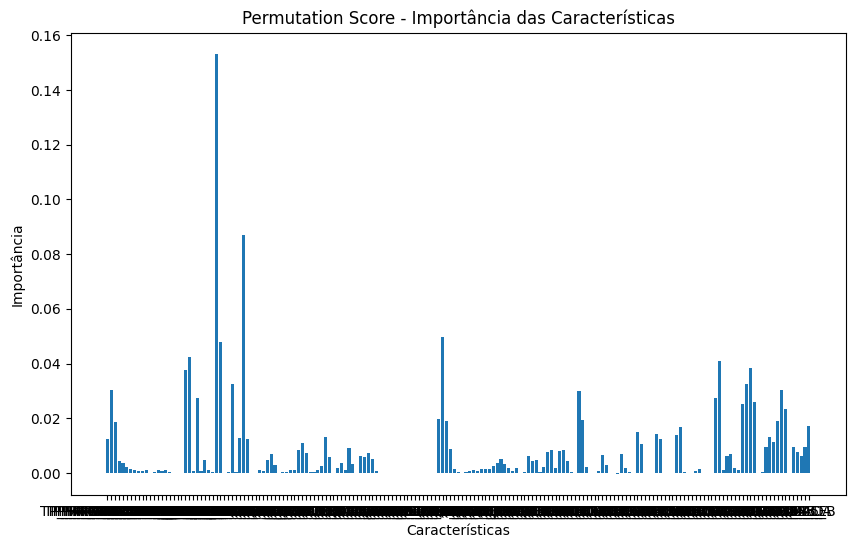

In [204]:
feature_names = x.columns  # Obtém os nomes das características

# Obtém os resultados do permutation score
scores = permutation_scores.importances_mean

# Plota o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(feature_names, scores)
plt.xlabel('Características')
plt.ylabel('Importância')
plt.title('Permutation Score - Importância das Características')
plt.show()

In [208]:
# Definir os rótulos das características (eixo x)
feature_names = x.columns

# Criar o gráfico de barras
fig = go.Figure(data=go.Bar(x=feature_names, y=permutation_scores.importances_mean))

# Adicionar título e rótulos dos eixos
fig.update_layout(
    title="Permutation Score por Característica",
    xaxis_title="Característica",
    yaxis_title="Permutation Score"
)

# Exibir o gráfico
fig.show()


In [211]:
from sklearn.inspection import permutation_importance
import numpy as np

# Obtenha as importâncias médias
importances = permutation_importance_scores

# Obtenha os índices das 40 features mais importantes
top_40_indices = np.argsort(importances)[-40:]

# Obtenha os nomes das 40 features mais importantes
top_40_features = np.array(feature_names)[top_40_indices]

# Exiba os nomes das 40 features mais importantes
print(top_40_features)


['Q024_C' 'Q025_A' 'Q022_C' 'Q014_B' 'Q002_F' 'Q022_E' 'TP_FAIXA_ETARIA_1'
 'Q015_B' 'TP_LINGUA_1' 'TP_ESCOLA_3' 'Q003_D' 'Q022_D' 'Q016_A' 'Q015_A'
 'Q014_A' 'Q016_B' 'Q025_B' 'TP_FAIXA_ETARIA_3' 'Q006_C' 'Q023_A' 'Q011_B'
 'Q006_A' 'Q024_A' 'Q020_A' 'Q021_B' 'Q018_A' 'TP_COR_RACA_1' 'Q011_A'
 'Q023_B' 'TP_FAIXA_ETARIA_2' 'Q020_B' 'TP_ESCOLA_1' 'TP_SEXO_F' 'Q021_A'
 'Q018_B' 'TP_SEXO_M' 'TP_ST_CONCLUSAO_2' 'Q006_B' 'TP_LINGUA_0'
 'TP_ST_CONCLUSAO_1']


## Treinando com essas features

In [212]:
x = dfvis_semna_ohe2[['Q024_C', 'Q025_A', 'Q022_C', 'Q014_B', 'Q002_F', 'Q022_E', 'TP_FAIXA_ETARIA_1', 'Q015_B', 'TP_LINGUA_1', 'TP_ESCOLA_3', 'Q003_D', 'Q022_D', 'Q016_A', 'Q015_A', 'Q014_A', 'Q016_B', 'Q025_B', 'TP_FAIXA_ETARIA_3', 'Q006_C', 'Q023_A', 'Q011_B', 'Q006_A', 'Q024_A', 'Q020_A', 'Q021_B', 'Q018_A', 'TP_COR_RACA_1', 'Q011_A', 'Q023_B', 'TP_FAIXA_ETARIA_2', 'Q020_B', 'TP_ESCOLA_1', 'TP_SEXO_F', 'Q021_A', 'Q018_B', 'TP_SEXO_M', 'TP_ST_CONCLUSAO_2', 'Q006_B', 'TP_LINGUA_0', 'TP_ST_CONCLUSAO_1']]
y = df2_semna[["NU_MEDIA"]]

In [214]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = 42, test_size=0.30)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SGDRegressor(max_iter=1000, random_state=42)
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

r2 = r2_score(teste_y, previsoes)*100
mae = mean_absolute_error(teste_y, previsoes)
rmse = math.sqrt(mean_squared_error(teste_y, previsoes))

print("O R2 score foi %.2f%%" % r2)
print("O Mean Absolute Error foi %.2f%%" % mae)
print("A Raiz do Mean Squared Error foi %.2f%%" % rmse)

Treinaremos com 77163 elementos e testaremos com 33071 elementos


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



O R2 score foi 29.76%
O Mean Absolute Error foi 58.67%
A Raiz do Mean Squared Error foi 74.01%
